# HOMEWORK - Chapter 9 problems
### Steven Vaught
---

**Newman 9.1**
Write a program to solve Poisson's equation for the system described in example 9.2. Work in units where $\epsilon_0 = 1$ & continue the iteration until your solution for the electric potential changes by less than $10^{-6}V$ per step at every point on the grid.

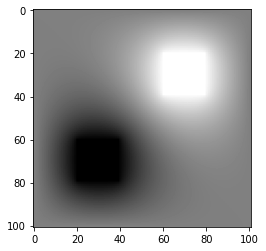

In [2]:
"""
Newman 9.1

Poisson's Equation
"""
import numpy as np
import matplotlib.pyplot as plt


# Constant Declaration
M = 100
a = 0.01
e0 = 1.0
Vplus = 1.0
Vminus = -1.0
target = 1.e-6
delta = 1.0

# Initialization
phi = np.ones([M+1,M+1],float)
phi[20:40,60:80] = Vplus
phi[60:80,20:40] = Vminus
phiprime = np.empty([M+1,M+1],float)


while delta > target:
    
    # Update potential
    phiprime[0,:] = 0.0
    phiprime[M,:] = 0.0
    phiprime[:,0] = 0.0
    phiprime[:,M] = 0.0
    phiprime[1:M,1:M] = (phi[0:M-1,1:M] + phi[2:M+1,1:M] \
                        + phi[1:M,0:M-1] + phi[1:M,2:M+1] \
                        + a*a/e0*phi[1:M,1:M])/4 

    phiprime[20:40,60:80] = Vplus
    phiprime[60:80,20:40] = Vminus
    
    # Calculate max diff. & swap arrays for next iteration
    delta = np.max(abs(phi-phiprime))
    phi, phiprime = phiprime, phi


# Plotting Stuff
plt.imshow(phiprime)
plt.gray()
plt.show()


**Newman 9.2**
Use the combined overrelaxation/Gauss-Seidel method to solve Laplace's equation for the two-dimensional problem in Example 9.1 - a square box 1 m on each side, at voltage $V=1$ volt along the top wall and zero volts along the other three. 

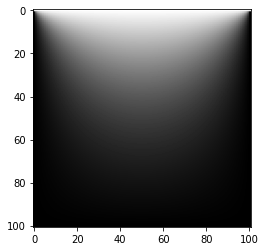

In [3]:
"""
Newman 9.2

Gauss-Seidel & Overrelaxation
"""
import numpy as np
import matplotlib.pyplot as plt


# Constant Declaration
M = 100
a = 0.01
e0 = 1.0
Vplus = 1.0
target = 1.e-6
delta = 1.0
omega = 0.9

# Initialization
phi = np.zeros([M+1,M+1],float)
phi[0,:] = Vplus

# break when we reach target accuracy
while delta > target:
    
    delta = 0
    # Updating Potential
    for i in range(1,M):
        for j in range(1,M):
            diff = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 - phi[i,j]
            phi[i,j] = phi[i,j] + (1 + omega) * diff

            # updating delta
            if diff > delta:
                delta = diff


# Plotting Stuff
plt.imshow(phi)
plt.gray()
plt.show()

**Newman 9.3**
Consider the following simple model of an electronic capacitor, consisting of two metal plates enclosed in a square metal box....

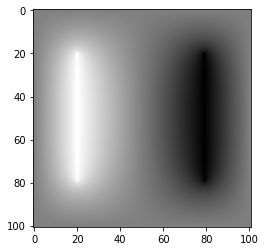

In [4]:
"""
Newman 9.3

Electronic Capacitor
"""
import numpy as np
import matplotlib.pyplot as plt


# Constant Declaration
M = 100
a = 0.01
e0 = 1.0
Vplus = 1.0
Vminus = -1.0
target = 1.e-6
delta = 1.0

# Initialization
phi = np.ones([M+1,M+1],float)
phi[20:80,20:21] = Vplus
phi[20:80,79:80] = Vminus
phiprime = np.empty([M+1,M+1],float)


while delta > target:
    
    # Update potential
    phiprime[0,:] = 0.0
    phiprime[M,:] = 0.0
    phiprime[:,0] = 0.0
    phiprime[:,M] = 0.0
    phiprime[1:M,1:M] = (phi[0:M-1,1:M] + phi[2:M+1,1:M] \
                        + phi[1:M,0:M-1] + phi[1:M,2:M+1] \
                        + a*a/e0*phi[1:M,1:M])/4 

    phiprime[20:80,20:21] = Vplus
    phiprime[20:80,79:80] = Vminus
    
    # Calculate max diff. & swap arrays for next iteration
    delta = np.max(abs(phi-phiprime))
    phi, phiprime = phiprime, phi


# Plotting Stuff
plt.imshow(phiprime)
plt.gray()
plt.show()


**Newman 9.4: Thermal Diffusion in the Earth's Crust**
Write a program to calculate the temperature profile of the crust as a function of depth up to 20 m and time up to 10 years.


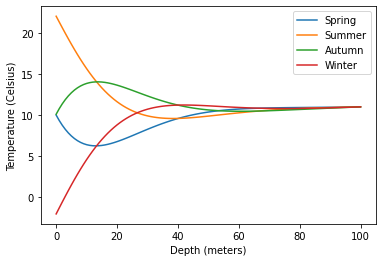

In [5]:
"""
Newman 9.4

Thermal Diffusion in the Earth's Crust
"""
import numpy as np
import matplotlib.pyplot as plt


# Constant Declaration
A = 10      #constant temp in celsius
B = 12      #constant temp in celsius
tau = 365   #Period of Earth orbit
L = 20      #depth in meters
D = 0.1     #thermal diffusivity
N = 100     #No. of grid divisions
a = L/N     #grid spacing
h = 1.e-2   #timestep
seasons = {
    1: "Spring",
    2: "Summer",
    3: "Autumn",
    4: "Winter"
}


# initialize
Temps = np.zeros(N+1,float)
Temps[1:N]=10


# function to calculate new temps
def CalcTemp(t):
	return A + B*np.sin(2*np.pi*t/tau)


# function to iterate differential equation from t_min to t_max
# Tlist is the initial set of temperatures
def iterate(Tlist ,t_min, t_max):
	t = t_min
	c = h*D/(a*a)

	while t<t_max:
	    # Calculate the new values of T
		Tlist[0] = CalcTemp(t)
		Tlist[N] = 11
		Tlist[1:N] = Tlist[1:N] + c*(Tlist[2:N+1]+Tlist[0:N-1]-2*Tlist[1:N])
		t += h

	return Tlist

#iterate first 9 years
temps_nine = iterate(Temps,0,365*9)

#initialize tenth year to nine year end
temps_ten = temps_nine
t_min = 365*9

# loop through every three months
for t_max in [365*9 + i*(365//4) for i in range(4)]:
    # find new temps & plot them
    temps_ten = iterate(temps_ten,t_min,t_max)
    index = int(t_max%365/(365//4)+1)
    plt.plot(temps_ten,label=f"{seasons[index]}")

    # move min time up for next iteration
    t_min = t_max


# Plotting stuff
plt.legend()
plt.xlabel("Depth (meters)")
plt.ylabel("Temperature (Celsius)")
plt.show()

**Newman 9.5:FTCS Solution of the Wave Equation**
Write a program that uses FTCS method to solve the complete set of simultaneous first-order equations with some initial conditions. Then animate it. Make sure if runs long enough to show the numerical instability!

<IPython.core.display.Javascript object>


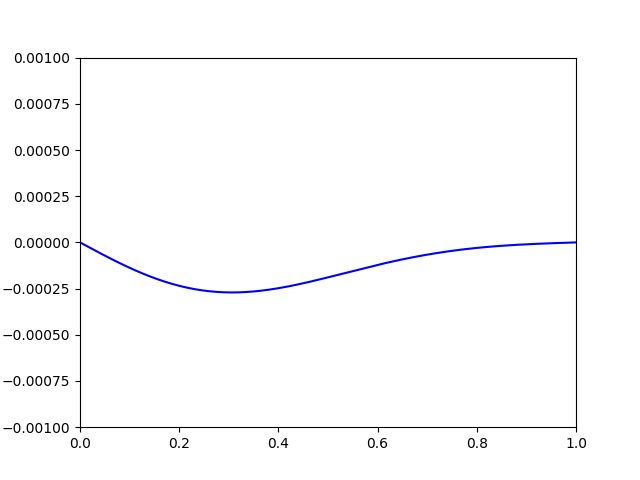

In [15]:
%matplotlib notebook
%matplotlib notebook
"""
Newman 9.5

FTCS Solution of the Wave Equation
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


""" Part A +++++++++++++++++++++++++++++++++++++++++++"""


# Constant Declaration
vel = 100.0             # 1 m/s
L = 1.0                 # 1 meter
d = 0.1                 # 10 cm
C = 1.0                 # 1 m/s
N = 200                 # No. of grid divisions
sigma = 0.3             # 30 cm
t = 0.0                 # start time at 0
tmax = 100.0e-3         # total time 1 second
a = L/N                 # spacing


# It took a lot of trial and error to get a timestep that didn't
# immediately explode into chaos
timestep = 5.0005e-5    


# Function Definitions
def fpsi(x):
    exp_part = np.exp(-(x-d)*(x-d)/2/sigma/sigma)
    return C*x*(L - x)/L**2*exp_part


# Initialization
xs = np.linspace(0, L, N+1)
phi = np.zeros(N+1, float)
psi = fpsi(xs)


# Main function
def iterate(phi, psi):
    t = 0.0
    # Main Loop
    while t < tmax:
        # new values of psi & phi & t
        phi[1:N] += timestep*psi[1:N]
        psi[1:N] += timestep*vel**2/(a**2)*(phi[2:N+1] + phi[0:N-1] - 2*phi[1:N])
        t += timestep
        yield phi


""" Part B +++++++++++++++++++++++++++++++++++++++++++"""


# Animation Initialization
fig = plt.figure()
ax = plt.axes(xlim = (0,1), ylim = (-.001,.001))
frame, = ax.plot([],[], lw = 3)

# Addding frames
frame_list = []
for p in iterate(phi, psi):
    frame, = ax.plot(xs, phi, "b")
    frame_list.append([frame,])

# Showing animation
anim = animation.ArtistAnimation(fig, frame_list, interval = 5, blit = True)
plt.show()
   


**Newman 9.7: Relaxation Method for Ordinary Diff. Eqs**

**Part A**

the following equations are given in the textbook:

$$
\frac{d^2x}{dt^2} = -g
$$

$$
f^{\prime\prime}(t) = \frac{f(t+h) + f(t-h) -2f(t)}{h^2}
$$

Combining these two expressions yields:

$$
-g = \frac{x_{t+h} + x_{t-h} -2x_{t}}{h^2}
$$

Rearranging further gives an iterative expression:

$$
x_t = \frac{1}{2}(gh^2 + x_{t+h} + x_{t-h})
$$

**Part B**

Using the expression derived in Part A, plot the trajectory of the ball

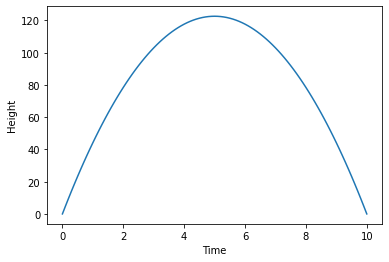

In [1]:
%matplotlib inline
%matplotlib inline
"""
Newman 9.7

The Relaxation Method for Ordinary Differential Equations
"""
import numpy as np
import matplotlib.pyplot as plt


# Constant Declaration
m = 1           # kg
g = 9.81        # m/s^2
tstart = 0      # seconds
tstop = 10      # seconds
N = 100         # number of points
eps = 1.e-6     # desired accuracy
timestep = (tstop - tstart)/N


# Initialization
ts = np.linspace(tstart, tstop, N+1)
xs = np.zeros(N+1, float)


# Function Definition
def iterate(xlist):
    diff = 1
    xs = xlist
    new_xs = np.empty(N+1, float)

    # Loop until desired accuracy
    while diff > eps:
        new_xs[0] = 0
        new_xs[1:N] = (g*timestep*timestep + xs[2:N+1] + xs[0:N-1])/2.

        # calc new diff & switch values
        diff = np.max(np.abs(new_xs - xs))
        new_xs, xs = xs, new_xs

    return new_xs


# Plotting stuff
plt.plot(ts, iterate(xs), label = "Trajectory of Ball")
plt.xlabel("Time")
plt.ylabel("Height")
plt.show()


**Newman 9.8: The Schrodinger Equation and the Crank-Nicolson Method**
##### Part A
Write a program that performs one step of the Crank-Nicolson Method
##### Part B
Extend the program to make an animation of the solution
##### Part C
Explain what happens in the animation

Iterating...


<IPython.core.display.Javascript object>


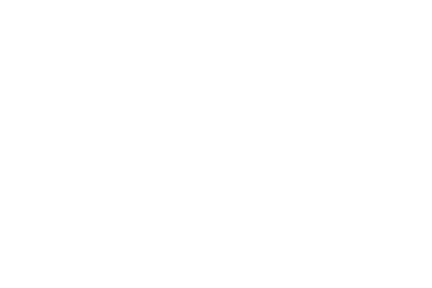

Plotting...


<IPython.core.display.Javascript object>


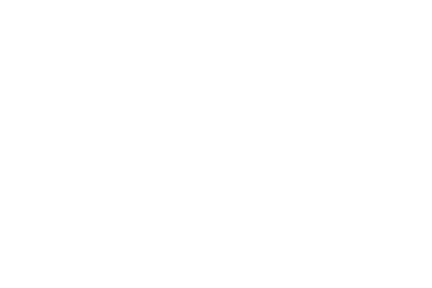

Traceback (most recent call last):
  File "/home/regtrash/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/home/regtrash/.local/lib/python3.7/site-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [2]:
%matplotlib notebook
%matplotlib notebook
"""
Newman 9.8

The Schrodinger equation & the Crank-Nicolson Method
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from cmath import exp


# Constants & Stuff
N = 1000        # num of slices
L = 1.0e-8     # length of box
x0 = L/2.0      # meters
sigma = 1.0e-10 # meters
kappa = 5.0e10  # 1/meters
M = 9.109e-31   # kg (mass of electron)
a = L/N         # slice size
hbar = 6.62e-34 # reduced plancks constant
timestep = h = 1.e-19
tmax = 4.0e-16  # max time


# Had to make a ufunc for complex exponent of numpy array
# this really should be built into numpy
@np.vectorize
def cexp(a):
    return exp(a)


# Took this function from Newman's online resources
def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = np.copy(Aa)
    v = np.copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v


""" Part A +++++++++++++++++++++++++++++++++++++++++"""


# Initialization

# First the 1D arrays
V = np.zeros(N+1, complex)
xs = np.linspace(0, L, N+1)
psi = np.zeros(N+1, complex)
psi[0:N+1] = cexp(-(xs[0:N+1] - x0)**2/(2*sigma*sigma)) * cexp(kappa*xs[0:N+1]*1j)

# Then some complex numbers
a1 = complex(1, h*hbar/(2*M*a*a))
a2 = complex(0, -h*hbar/(4*M*a*a))
b1 = complex(1, -h*hbar/(2*M*a*a))
b2 = complex(0, h*hbar/(4*M*a*a))

# Then a Banded matrix
A = np.zeros([3, N+1], complex)
A[0,:] = a2
A[1,:] = a1
A[2,:] = a2

# Function to perform one iteration of the calculation
def iterate(_V, _psi):
    V[1:N] = b1*_psi[1:N] + b2*(_psi[2:N+1] + _psi[0:N-1])
    psi = banded(A, V, 1, 1)
    return V, psi
    

""" Part B +++++++++++++++++++++++++++++++++++++++++"""


# Iteration
real_psis = []
t = 0
print("Iterating...")
while t < tmax:
    V, psi = iterate(V, psi)
    real_psi = psi.real
    real_psis.append(real_psi)
    t += h

# Animation Initialization
fig = plt.figure()
ax = plt.axes(ylim = (-1, 1))
frame, = ax.plot([],[], lw = 3)

# Generating Frames
print("Plotting...")
frame_list = []
for p in real_psis:
    frame, = ax.plot(xs, p, "b")
    frame_list.append([frame,])

# Showing animation
anim = animation.ArtistAnimation(fig, frame_list, interval = 20, blit = True)
plt.show()

### Interpretation
So I got the animation to work once, but the code has since stopped working. I'm not really sure what happened, I can't figure out how to fix it (the problem is that the every entry in psi is 0 at every timestep). It works for the first iteration, but the subsequent iterations are broken. When it did work, it looked like the wavefunction spread out as it evolved, implying that the state becomes more delocalized. As it becomes delocaclized, the amplitudes went down to preserve normality (sum of probabilties equal 1)

**Newman 9.9: The Schrodinger Equation & the Spectral Method**
##### Part A
Write a program that calculates the coefficienst $b_k$ & perform discrete sine transforms
##### Part B
extend the program to calculate the real part of the wavefunction at an arbitrary time $t$
##### Part C
extend the program to animate the solution
##### Part D
Explain the animation with Physics and stuff

<IPython.core.display.Javascript object>


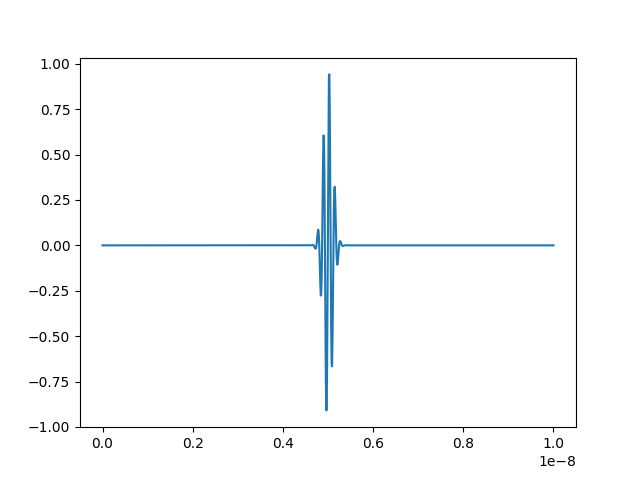

/usr/lib/python3/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


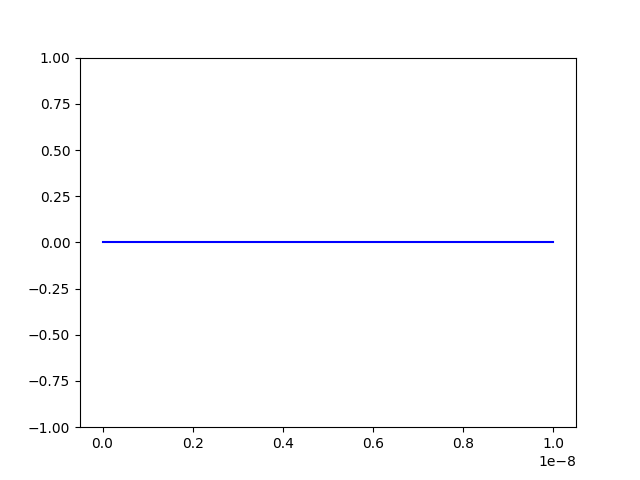

Plotting...
Done Plotting!


In [3]:
%matplotlib notebook
%matplotlib notebook
"""
Newman 9.9

The Schrodinger Equation and the Spectral Method
"""
import numpy as np
from numpy.fft import rfft, irfft
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from cmath import exp


# Constant Declaration
N = 1000        # num of slices
L = 1.0e-8     # length of box
x0 = L/2.0      # meters
sigma = 1.0e-10 # meters
kappa = 5.0e10  # 1/meters
M = 9.109e-31   # kg (mass of electron)
a = L/N         # slice size
hbar = 6.62e-34 # reduced plancks constant
timestep = h = 1.e-19
tmax = 1.0e-16  # max time


# Taken from Newman's online resources
######################################################################
# 1D DST Type-I

def dst(y):
    N = len(y)
    y2 = np.empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -np.imag(rfft(y2))[:N]
    a[0] = 0.0
    return a


######################################################################
# 1D inverse DST Type-I

def idst(a):
    N = len(a)
    c = np.empty(N+1,complex)
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = irfft(c)[:N]
    y[0] = 0.0
    return y


######################################################################

# Had to make a ufunc for exponential of a complex numpy array
# this really should be built into numpy
@np.vectorize
def cexp(a):
    return exp(a)

""" Part A ++++++++++++++++++++++++++++++++++++++++++++++++++++++++"""

# Initialize position
xs = np.linspace(0, L, N+1)

# Initialize wavefunciton & real & complex
psi = np.empty(N+1, complex)
psi[0:N+1] = cexp(-(xs[0:N+1] - x0)**2/(2*sigma*sigma)) * cexp(kappa*xs[0:N+1]*1j)
r_psi = np.empty(N+1, float)
r_psi = psi.real
i_psi = np.empty(N+1, float)
i_psi = psi.imag

# Discrete Since Transforms
rbs = dst(r_psi)
ibs = dst(i_psi)


""" Part B ++++++++++++++++++++++++++++++++++++++++++++++++++++++++"""

# Finds real part of wavefunction
k = np.array([i+1 for i in range(N+1)])
t = 1e-16
def iterate(psi, t):
    cs = (rbs*np.cos(np.pi**2*hbar*hbar/(2*M*k*k*L*L)*t)) \
    - (ibs*np.sin(np.pi**2*hbar*hbar/(2*M*k*k*L*L)*t))
    cs *= np.sin(np.pi*k*xs/N)
    psi = idst(cs)
    psi *= np.sin(np.pi*k*xs/N)
    return psi, cs

# plotting one iteration at t = 1.e-16
new_psi, _ = iterate(psi, t)
plt.plot(xs, psi)
plt.show()


""" Part C ++++++++++++++++++++++++++++++++++++++++++++++++++++++++"""


# Iterations...
real_psis = []
t = 0
while t < tmax:
    psi, cs = iterate(psi, t)
    real_psis.append(psi)
    t += h

# Animation Initialization
fig = plt.figure()
ax = plt.axes(ylim = (-1, 1))
frame, = ax.plot([],[], lw = 3)

# Generating Frames
print("Plotting...")
frame_list = []
for p in real_psis:
    frame, = ax.plot(xs, p, "b")
    frame_list.append([frame,])

# Showing animation
print("Done Plotting!")
anim = animation.ArtistAnimation(fig, frame_list, interval = 20, blit = True)
plt.show()



### Interpretation
So I got the animation to work once, but the code has since stopped working. I'm not really sure what happened, I can't figure out how to fix it (the problem is that the every entry in psi is 0 at every timestep). It works for the first iteration, but the subsequent iterations are broken. When it did work, it looked like the wavefunction spread out as it evolved, implying that the state becomes more delocalized. As it becomes delocaclized, the amplitudes went down to preserve normality (sum of probabilties equal 1)